### 다중 선형회귀 - 보스톤 주택 가격

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- 데이터 탐색

In [29]:
df = pd.read_csv('data/Boston_house.csv')
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


- Feature별 산점도와 선형회귀선

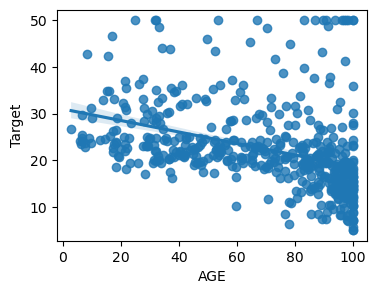

In [30]:
plt.figure(figsize=(4,3))
sns.regplot(x='AGE', y='Target', data=df);

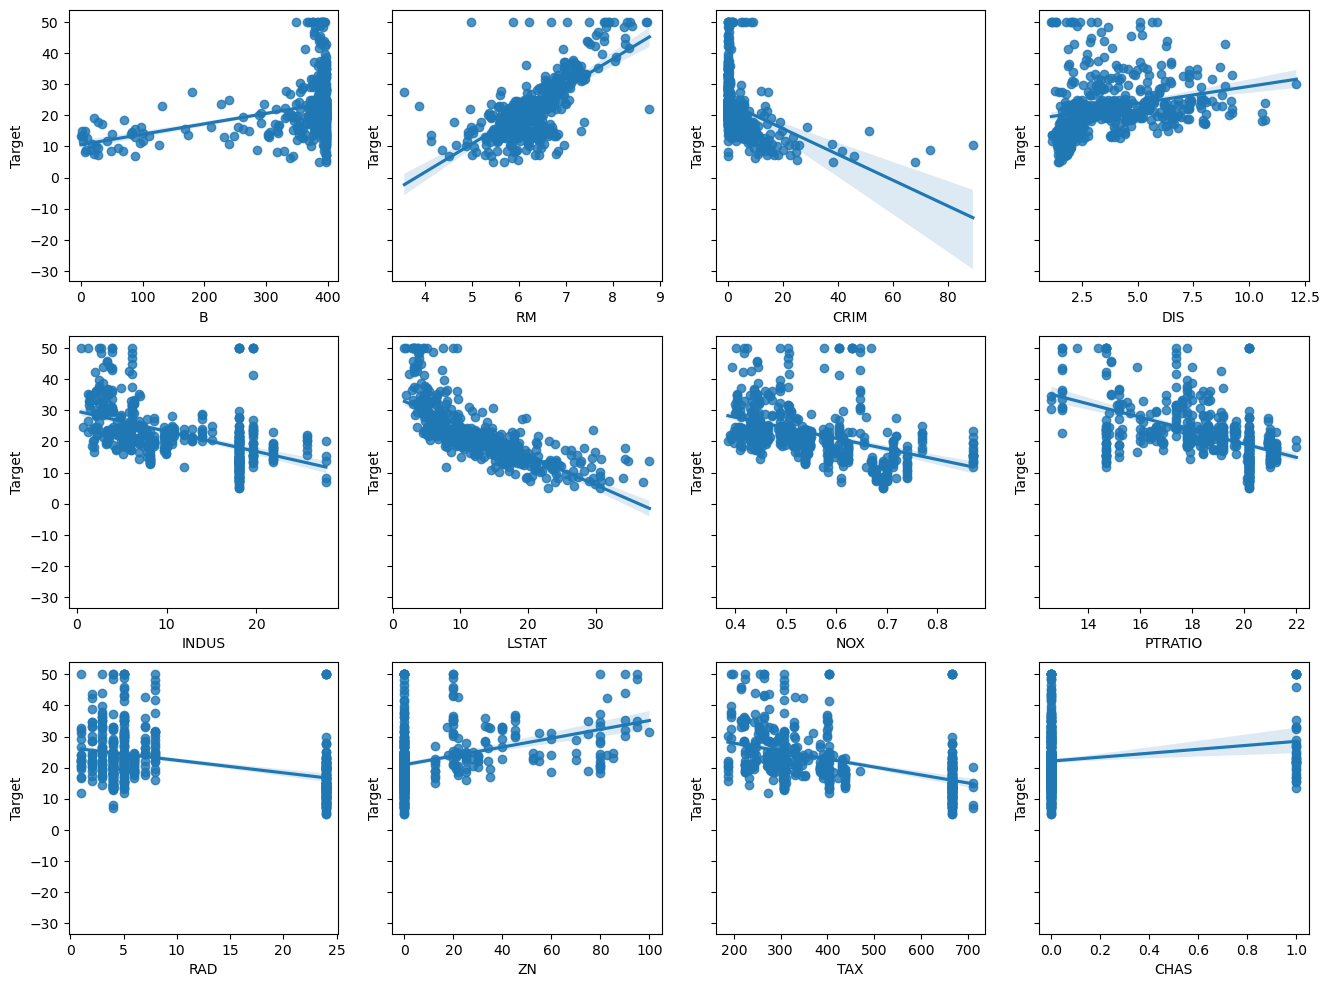

In [31]:
fig, axs = plt.subplots(3, 4, figsize=(16, 12), sharey=True)
for i, feature in enumerate(df.columns[1:-1]):
    row, col = i//4, i%4
    sns.regplot(x=feature, y='Target', data=df, ax=axs[row][col])

- Feature별 결정 계수와 산점도

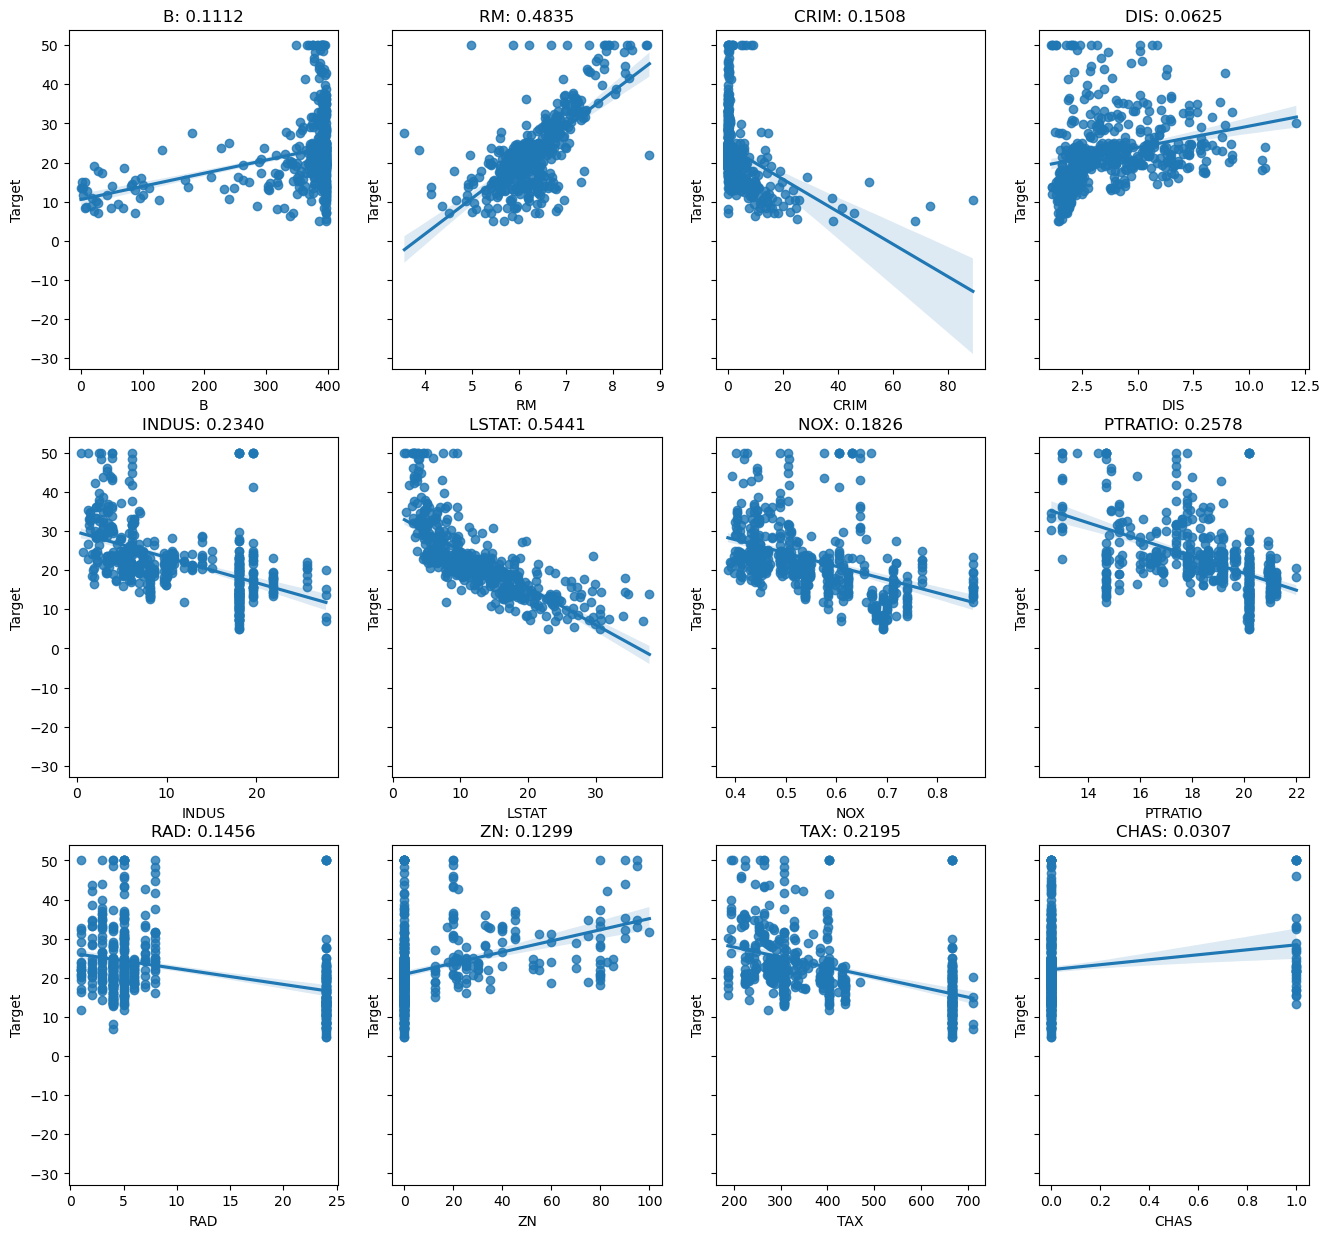

In [32]:
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(3, 4, figsize=(16, 15), sharey=True)
for i, feature in enumerate(df.columns[1:-1]):
    row, col = i//4, i%4
    ax = axs[row][col]
    sns.regplot(x=feature, y='Target', data=df, ax=axs[row][col])
    lr = LinearRegression()
    X = df[feature].values.reshape(-1, 1)
    lr.fit(X, df.Target.values)
    score = lr.score(X, df.Target.values)
    ax.set_title(f'{feature}: {score:.4f}')
    

- 다중 선형회귀

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1].values, df.Target.values, test_size=0.2 ,random_state=2023
)


In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
# 결정계수(R^2)
lr.score(X_test, y_test)

0.7927610576409561

In [36]:
# weight, bias
lr.coef_, lr.intercept_

(array([-5.26514360e-03,  7.06616939e-03,  3.63279393e+00, -1.07082424e-01,
        -1.38747168e+00,  8.92989147e-03, -5.27035449e-01, -1.64967974e+01,
        -8.53797921e-01,  2.50556442e-01,  3.87223109e-02, -1.05238685e-02,
         2.42299873e+00]),
 35.85864603523433)

- 회귀식

    Target = -0.0053 * AGE -0.0071 * B + 3.63 * RM + ... + 2.42 * CHAS + 35.86

- 개별 테스트 데이터에 적용

In [37]:
X_test[0], y_test[0]

(array([ 95.3    , 319.98   ,   6.006  ,   7.02259,   1.8746 ,  18.1    ,
         15.7    ,   0.718  ,  20.2    ,  24.     ,   0.     , 666.     ,
          0.     ]),
 14.2)

In [38]:
# Weight, bias를 이용한 예측
np.dot(lr.coef_, X_test[0]) + lr.intercept_

17.883734821383083

In [39]:
# predict()를 이용한 예측
y_hat = lr.predict(X_test[0].reshape(1, -1))
y_hat[0]

17.883734821383083

In [40]:
# 10개 테스트 데이터에 적용
y_hat = lr.predict(X_test)
for i in range(10):
    print(f'실제값: {y_test[i]}, 예측값: {y_hat[i]:.3f}')

실제값: 14.2, 예측값: 17.884
실제값: 15.6, 예측값: 15.934
실제값: 23.7, 예측값: 27.497
실제값: 20.4, 예측값: 20.036
실제값: 23.1, 예측값: 25.031
실제값: 50.0, 예측값: 39.476
실제값: 23.2, 예측값: 22.010
실제값: 36.0, 예측값: 35.386
실제값: 17.1, 예측값: 19.482
실제값: 14.1, 예측값: 16.181


#### 회귀는 선형회귀 외에도 다른 모델이 많음

- SVR

In [41]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [42]:
svr = SVR()
svr.fit(X_train, y_train)
y_hat_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, y_hat_sv)
mse_sv = mean_squared_error(y_test, y_hat_sv)
r2_sv

0.14231119075362408

- Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
y_hat_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, y_hat_rf)
mse_rf = mean_squared_error(y_test, y_hat_rf)
r2_rf

0.9054281569702582

- XGBoost

In [44]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_hat_xg = xgbr.predict(X_test)
r2_xg = r2_score(y_test, y_hat_xg)
mse_xg = mean_squared_error(y_test, y_hat_xg)
r2_xg


0.8960290770958557

- Linear Regression

In [45]:
r2_lr = r2_score(y_test, y_hat)
mse_lr = mean_squared_error(y_test, y_hat)

- 비교

In [48]:
print(f'R Squared\t{r2_lr:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xgb:.4f}')
print(f'MSE\t\t{mse_lr:.2f}\t{mse_sv:.2f}\t{mse_rf:.2f}\t{mse_xgb:.2f}')

R Squared	0.7928	0.1423	0.9054	0.8960
MSE		20.53	84.98	9.37	10.30


In [49]:
rf = pd.DataFrame({
    'y': y_test, 'LR': y_hat, 'SVM': y_hat_sv, 'RF': y_hat_rf, 'XGB': y_hat_xgb
})
rf.head()

,y,LR,SVM,RF,XGB
0,14.2,17.883735,14.901355,16.279,14.556116
1,15.6,15.933986,21.973629,16.777,16.351431
2,23.7,27.497459,23.720547,23.939,24.282385
3,20.4,20.036096,22.600706,20.016,20.027905
4,23.1,25.031125,23.111498,24.368,24.548002
